In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt
%matplotlib inline

# Load neural timeseries

In [38]:
#Data downloaded from https://janelia.figshare.com/articles/Whole-brain_light-sheet_imaging_data/7272617

In [25]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])

In [26]:
print(neural_dat.shape)

(2880, 83205)


# Get behavior, stim and cell position arrays

In [27]:
regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')

In [28]:
cell_pos=regressors['data']['CellXYZ'][0][0]

In [29]:
#Exclude bad cells
missing_values=regressors['data']['IX_inval_anat'][0][0]

In [33]:
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [34]:
print(cell_pos.shape)

(83205, 3)


# Subsample neurons

In [35]:
np.seed=7
random_neurons=np.random.choice(neural_dat.shape[1],10000,replace=False)

In [36]:
neural_dat=neural_dat[:,random_neurons]

In [37]:
cell_pos=cell_pos[random_neurons,:]

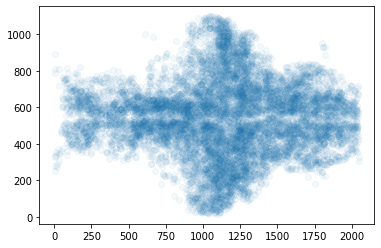

In [45]:
plt.scatter(cell_pos[:,0], cell_pos[:,1], cmap='bwr', alpha = .05)

# Train Test Split

In [ ]:
def train_test_split(NT):
        nsegs = 20
        nt=NT
        nlen  = nt/nsegs
        ninds = np.linspace(0,nt-nlen,nsegs).astype(int)
        itest = (ninds[:,np.newaxis] + np.arange(0,nlen*0.25,1,int)).flatten()
        itrain = np.ones(nt, np.bool)
        itrain[itest] = 0
        return itrain, itest